In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import (mean_squared_error, r2_score, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc)
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

written answers are in PDF submission

# Problem 1 [Regularization]
c. simulate N = 1000 values of random variable X, distributed uniformly on interval [-2, 2]. simulate the values of random variable Y = 1 + 2X + e, where e is drawn from a gaussian distribution N(0, 2).

fit this data with linear regression, and also with ridge regression for different values of lambda {1, 10, 100, 1000, 10000}. print the slope, MSE, and R^2 statistics for each case and write down some observations. what happens as the regularization parameter lambda increases?

In [2]:
# for reproducibility
np.random.seed(42)

# simulate data
N = 1000 # 1000 values
X = np.random.uniform(-2, 2, size=(N, 1)) # RV X distributed uniformly on interval [-2, 2]
e = np.random.normal(0, np.sqrt(2), size=N) # e from gaussian distribution N(0,2)
y = 1 + 2 * X.flatten() + e # RV Y (given equation)

# linear regression
linreg = LinearRegression()
linreg.fit(X, y)
y_pred_lin = linreg.predict(X)

print("linear regression")
print("slope:", round(linreg.coef_[0], 2))
print("MSE:", round(mean_squared_error(y, y_pred_lin), 2))
print("R^2:", round(r2_score(y, y_pred_lin), 2))
print()

# ridge regression w/ different values of lambda
lambdas = [1, 10, 100, 1000, 10000]

for lam in lambdas:
    ridge = Ridge(alpha=lam, fit_intercept=True)
    ridge.fit(X, y)
    y_pred_ridge = ridge.predict(X)
    
    print(f"ridge regression (lambda = {lam})")
    print("slope:", round(ridge.coef_[0], 2))
    print("MSE:", round(mean_squared_error(y, y_pred_ridge), 2))
    print("R^2:", round(r2_score(y, y_pred_ridge), 2))
    print()

linear regression
slope: 1.95
MSE: 1.95
R^2: 0.73

ridge regression (lambda = 1)
slope: 1.94
MSE: 1.95
R^2: 0.73

ridge regression (lambda = 10)
slope: 1.93
MSE: 1.95
R^2: 0.73

ridge regression (lambda = 100)
slope: 1.81
MSE: 1.97
R^2: 0.72

ridge regression (lambda = 1000)
slope: 1.12
MSE: 2.87
R^2: 0.6

ridge regression (lambda = 10000)
slope: 0.23
MSE: 5.95
R^2: 0.16



# Problem 2 [Programming: Logistic Regression]

In [3]:
# read in datasets
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
columns = pd.read_csv("columns.csv")
flights = pd.read_csv("flights.csv")

feature = 'ARRIVAL_DELAY'

first split the original data into 75% for training and 25% for testing. choose the training set at random. then use StandardScaler to normalize the features of the training set and train a logistic regression model on this normalized training set. apply the same transformation to the testing set.

In [4]:
# separate features and target
X = flights.drop(columns=feature)
y = flights[feature]

# split into training and testing (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit on train
X_test_scaled = scaler.transform(X_test) # apply to test

# train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# predictions using test set
y_pred = logreg.predict(X_test_scaled)

a. output the following on the testing set:
- confusion matrix
- true positives, false positives, true negatives, false negatives
- accuracy, error
- precision, recall, F1 score

In [5]:
# confusion matrix and TP, FP, TN, FP
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("confusion matrix")
print(cm)
print()

print("true positives (TP):", tp)
print("false positives (FP):", fp)
print("true negatives (TN):", tn)
print("false negatives (FN):", fn)
print()

# other metrics
print("accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("error:", round(1 - accuracy_score(y_test, y_pred), 2))
print("precision:", round(precision_score(y_test, y_pred), 2))
print("recall:", round(recall_score(y_test, y_pred), 2))
print("f1 score:", round(f1_score(y_test, y_pred), 2))

confusion matrix
[[707 544]
 [505 744]]

true positives (TP): 744
false positives (FP): 544
true negatives (TN): 707
false negatives (FN): 505

accuracy: 0.58
error: 0.42
precision: 0.58
recall: 0.6
f1 score: 0.59


b. print the coefficients of the features in the model. which feature contributes most to the prediction? what are the top three features that are most positively correlated with the class? similarly, what are the top three features that are most negatively correlated with the class?

In [6]:
# get feature names from columns.csv
feature_names = columns.iloc[:, 0].values
feature_names = feature_names[feature_names != feature]

# get coefficients
coefs = logreg.coef_.flatten()

# store in dataframe
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs
})

# results
print(coef_df)
print()

print("feature that contributes the most:")
print(coef_df.loc[coef_df.coefficient.abs().idxmax()])
print()

print("top three positively correlated features:")
print(coef_df.sort_values("coefficient", ascending=False).head(3))
print()

print("top 3 negatively correlated features:")
print(coef_df.sort_values("coefficient").head(3))

                     feature  coefficient
0                      MONTH    -0.115063
1                DAY_OF_WEEK    -0.052369
2                   DISTANCE    -0.021925
3        SCHEDULED_DEPARTURE     0.437035
4                 AIRLINE_AS    -0.008503
..                       ...          ...
654  DESTINATION_AIRPORT_WRG     0.197158
655  DESTINATION_AIRPORT_WYS    -0.071766
656  DESTINATION_AIRPORT_XNA    -0.053666
657  DESTINATION_AIRPORT_YAK     0.000000
658  DESTINATION_AIRPORT_YUM    -0.146941

[659 rows x 2 columns]

feature that contributes the most:
feature        SCHEDULED_DEPARTURE
coefficient               0.437035
Name: 3, dtype: object

top three positively correlated features:
                     feature  coefficient
3        SCHEDULED_DEPARTURE     0.437035
654  DESTINATION_AIRPORT_WRG     0.197158
95        ORIGIN_AIRPORT_CWA     0.152991

top 3 negatively correlated features:
                     feature  coefficient
338  DESTINATION_AIRPORT_ABI    -0.225254
133      

c. vary the decision threshold T {0.25, 0.5, 0.75, 0.9} and report for each value the model accuracy, precision, and recall. comment on how these metrics vary with the choice of threshold.

In [7]:
# predicted probabilities for the positive class
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

thresholds = [0.25, 0.5, 0.75, 0.9]

results = []

for T in thresholds:
    y_pred_T = (y_prob >= T).astype(int)

    results.append({
        "threshold": T,
        "accuracy": accuracy_score(y_test, y_pred_T),
        "precision": precision_score(y_test, y_pred_T),
        "recall": recall_score(y_test, y_pred_T)
    })

results = pd.DataFrame(results)
round(results, 2)

,threshold,accuracy,precision,recall
0,0.25,0.53,0.51,0.96
1,0.50,0.58,0.58,0.60
2,0.75,0.52,0.60,0.09
3,0.90,0.51,0.65,0.02


# Problem 3 [Programming: Gradient Descent for Logistic Regression]

use your implementation of gradient descent from HW2 and adapt it for logistic regression. you can use the same training and testing split from problem 2.

take 3 values of the learning rate (0.1, 0.01, 001) and report the cross-entropy loss objective after 10, 50, and 100 iterations. at 100 iterations, report the accuracy, precision, recall, and F1 score for the 3 learning rates, and compare with the metrics from problem 2. 

In [8]:
# functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y, y_hat):
    eps = 1e-15
    y_hat = np.clip(y_hat, eps, 1-eps)
    return -np.mean(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

def gradient_descent_logreg(xb, y, alpha, num_iters):
    n, d = xb.shape
    theta = np.zeros((d, 1))
    losses = []

    for i in range(num_iters):
        z = xb @ theta
        y_hat = sigmoid(z)

        grad = (1/n) * (xb.T @ (y_hat-y))
        theta = theta - alpha * grad

        loss = cross_entropy_loss(y, y_hat)
        losses.append(loss)

    return theta, losses

def predict_proba(xb, theta):
    return sigmoid(xb @ theta).flatten()

def predict_labels(xb, theta, threshold=0.5):
    return (predict_proba(xb, theta) >= threshold).astype(int)

In [9]:
# convert to numpy
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# add intercept column
xb_train = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
xb_test = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

learning_rates = [0.1, 0.01, 0.001]
iterations = [10, 50, 100]

rows = []

for alpha in learning_rates:
    theta, losses = gradient_descent_logreg(xb_train, y_train, alpha, max(iterations))
    
    for it in iterations:
        rows.append([alpha,it,losses[it - 1]  ])

gd_log_results = pd.DataFrame(rows,columns=["learning rate", "# iterations", "cross-entropy loss"])

round(gd_log_results, 3)


,learning rate,# iterations,cross-entropy loss
0,0.100,10,0.667
1,0.100,50,0.630
2,0.100,100,0.622
3,0.010,10,0.690
4,0.010,50,0.677
5,0.010,100,0.665
6,0.001,10,0.693
7,0.001,50,0.691
8,0.001,100,0.689


In [10]:
# metrics at 100 iterations

metric_rows = []

for alpha in learning_rates:
    theta, _ = gradient_descent_logreg(xb_train, y_train, alpha, 100)

    yhat_train = predict_labels(xb_train, theta)

    metric_rows.append([
        alpha,
        accuracy_score(y_train, yhat_train),
        precision_score(y_train, yhat_train),
        recall_score(y_train, yhat_train),
        f1_score(y_train, yhat_train)
    ])

gd_log_metrics = pd.DataFrame(metric_rows, columns=[
    "learning rate", "accuracy", "precision", "recall", "f1 score"
])

round(gd_log_metrics, 3)

,learning rate,accuracy,precision,recall,f1 score
0,0.100,0.643,0.640,0.642,0.641
1,0.010,0.635,0.630,0.642,0.636
2,0.001,0.632,0.627,0.638,0.633


# Problem 4 [Programming: Comparing Classifiers]

train the following classifiers using the training data:
1. kNN
2. logistic regression
3. LDA

a. use n = 5 cross-validation to select the k hyper-parameter for **kNN** for the following values: k {3, 5, 7, 21}. show the accuracy, error, precision, recall, and F1 score metrics on the **validation dataset** for each value of k. select the value of k that minimizes the average cross validation error.

In [11]:
# knn selecting k

k_values = [3, 5, 7, 21]
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rows = []

# run with each k
for k in k_values:
    # to store results across folds
    acc_scores, err_scores, prec_scores, rec_scores, f1_scores = [], [], [], [], []

    for train_index, val_index in kf.split(X_train_scaled):
        X_tr = X_train_scaled[train_index]
        X_val = X_train_scaled[val_index]
        y_tr = y_train[train_index].ravel()
        y_val = y_train[val_index].ravel()
        
        # initialize model and fit
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tr, y_tr)
        
        y_pred = knn.predict(X_val)
        
        # scores
        acc_scores.append(accuracy_score(y_val, y_pred))
        err_scores.append(1 - accuracy_score(y_val, y_pred))
        prec_scores.append(precision_score(y_val, y_pred))
        rec_scores.append(recall_score(y_val, y_pred))
        f1_scores.append(f1_score(y_val, y_pred))

        rows.append([
            k, np.mean(acc_scores), np.mean(err_scores), np.mean(prec_scores),
            np.mean(rec_scores), np.mean(f1_scores)
        ])

cv_results = pd.DataFrame(
    rows, columns = ["k", "accuracy", "error", "precision", "recall", "f1 score"]
)

round(cv_results, 3)

,k,accuracy,error,precision,recall,f1 score
0,3,0.524,0.476,0.517,0.522,0.520
1,3,0.522,0.478,0.521,0.523,0.522
2,3,0.513,0.487,0.510,0.523,0.516
3,3,0.515,0.485,0.510,0.531,0.520
4,3,0.514,0.486,0.511,0.525,0.517
5,5,0.547,0.453,0.540,0.552,0.546
6,5,0.531,0.469,0.529,0.539,0.534
7,5,0.528,0.472,0.524,0.546,0.534
8,5,0.526,0.474,0.520,0.544,0.532
9,5,0.525,0.475,0.521,0.538,0.529


In [12]:
# select best k with minimim average error
cv_results.loc[cv_results["error"].idxmin()]

k            21.000000
accuracy      0.554000
error         0.446000
precision     0.544872
recall        0.575101
f1 score      0.559579
Name: 15, dtype: float64

b. print the accuracy, error, precision, recall, and F1 score metrics for **all 3 classifiers** on **both training and testing data**. which model is performing better? write down some observations.

In [13]:
# helper function to compute metrics quickly
def compute_metrics(y_true, y_pred):
    return{
        "accuracy": accuracy_score(y_true, y_pred),
        "error": 1 - accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1 score": f1_score(y_true, y_pred)
    }

In [14]:
# knn (with k = 21)

# model
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_scaled, y_train.ravel())

# predictions
knn_train_pred = knn.predict(X_train_scaled)
knn_test_pred = knn.predict(X_test_scaled)

# metrics
knn_train_metrics = compute_metrics(y_train.ravel(), knn_train_pred)
knn_test_metrics = compute_metrics(y_test.ravel(), knn_test_pred)

In [15]:
# logistic regression

# model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train.ravel())

# predictions
log_train_pred = logreg.predict(X_train_scaled)
log_test_pred = logreg.predict(X_test_scaled)

# metrics
log_train_metrics = compute_metrics(y_train.ravel(), log_train_pred)
log_test_metrics = compute_metrics(y_test.ravel(), log_test_pred)

In [16]:
# lda

# model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train.ravel())

# predictions
lda_train_pred = lda.predict(X_train_scaled)
lda_test_pred = lda.predict(X_test_scaled)

# metrics
lda_train_metrics = compute_metrics(y_train.ravel(), lda_train_pred)
lda_test_metrics = compute_metrics(y_test.ravel(), lda_test_pred)

In [17]:
# combine results

results_train = pd.DataFrame.from_dict(
    {
        "knn (k=21)": knn_train_metrics,
        "logistic regression": log_train_metrics,
        "lda": lda_train_metrics
    }, orient="index"
)

results_test = pd.DataFrame.from_dict(
    {
        "knn (k=21)": knn_test_metrics,
        "logistic regression": log_test_metrics,
        "lda": lda_test_metrics
    }, orient="index"
)

# print
print("training metrics:")
print(round(results_train, 3))
print()
print("testing metrics:")
print(round(results_test, 3))

training metrics:
                     accuracy  error  precision  recall  f1 score
knn (k=21)              0.610  0.390      0.603   0.628     0.615
logistic regression     0.648  0.352      0.644   0.650     0.647
lda                     0.649  0.351      0.645   0.652     0.649

testing metrics:
                     accuracy  error  precision  recall  f1 score
knn (k=21)              0.519  0.481      0.518   0.540     0.529
logistic regression     0.580  0.420      0.578   0.596     0.587
lda                     0.579  0.421      0.576   0.599     0.587


c. generate a graph that includes the ROC curve for the **logistic regression** and the **LDA** classifiers on the **testing set**. compute the area under the curve (AUC) metric for both classifiers. you can use a package.

In [18]:
# predicted probabilities for positive class
log_probs = logreg.predict_proba(X_test_scaled)[:, 1]
lda_probs = lda.predict_proba(X_test_scaled)[:, 1]

# compute roc curves
fpr_log, tpr_log, _ = roc_curve(y_test.ravel(), log_probs)
fpr_lda, tpr_lda, _ = roc_curve(y_test.ravel(), lda_probs)

# compute auc
auc_log = auc(fpr_log, tpr_log)
auc_lda = auc(fpr_lda, tpr_lda)

print("logistic regression AUC:", round(auc_log, 3))
print("LDA AUC:", round(auc_lda, 3))

logistic regression AUC: 0.606
LDA AUC: 0.607


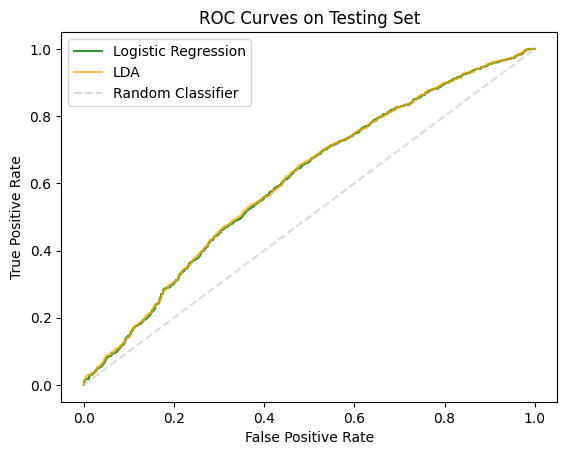

In [19]:
# plot roc curves
plt.figure()
plt.plot(fpr_log, tpr_log, color="green", alpha=0.8, label="Logistic Regression")
plt.plot(fpr_lda, tpr_lda, color="orange", alpha=0.7, label="LDA")
plt.plot([0, 1], [0, 1], linestyle="--", color="lightgray", alpha=0.8, label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves on Testing Set")
plt.legend()
plt.show()

d. write code to plot a ROC curve without a package for **logistic regression**. vary the prediction threshold T {0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1} and compute false positive and true positive rates for each threshold. plot a ROC curve for these points and compare it with the ROC curve generated in part c. what are the differences and what changes can you make to get the two ROC curves to become more similar?

In [20]:
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# predicted probabilities for positive class
probs = logreg.predict_proba(X_test_scaled)[:, 1]
y_true = y_test.ravel()

# store results for all thresholds
fprs, tprs = [], []

for T in thresholds:
    y_pred = (probs >= T).astype(int)
 
    # calculate TP, FP, TN, FN
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    # calculate TPR and FPR
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    
    tprs.append(TPR)
    fprs.append(FPR)

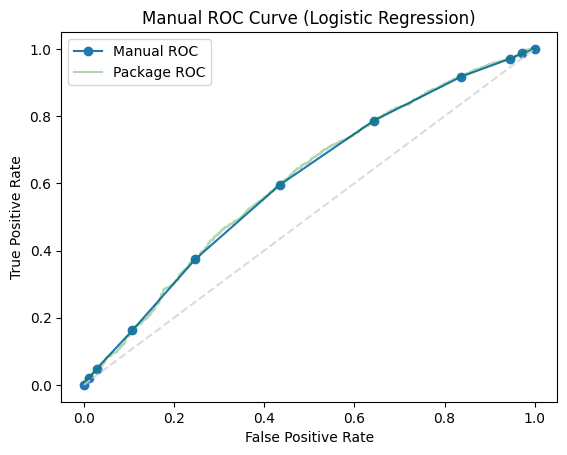

In [21]:
# plot
plt.figure()
plt.plot(fprs, tprs, marker="o", label="Manual ROC")
plt.plot(fpr_log, tpr_log, color="green", alpha=0.3, label="Package ROC")
plt.plot([0, 1], [0, 1], linestyle="--", color="lightgray", alpha=0.8)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Manual ROC Curve (Logistic Regression)")
plt.legend()
plt.show()

# Problem 5 [Programming: Cross Validation]

implement your own k-fold cross-validation algorithm and apply it to the **logistic regression** and **LDA** classifiers. as a reminder, you should apply feature normalization using StandardScaler to the training set before training and apply the same transformation to the testing set before inference.

a. implement k-fold cross-validation (CV) for training a model. the CV algorithm consists of the following steps:
1. divide the entire data in k partitions of equal size.
2. run k experiments. in each experiment i {1, ..., k}, train on k-1 partitions and test on the validation set (partition i).
3. record the validation error for each experiment.
4. compute and print the average validation error across all k experiments.

b. run the cross-validation experiment for logistic regression and LDA using K {5, 10} folds. you may use a package for training the logistic regression and LDA models. report the average validation error for each model and each value of K.

c. which model performs better? compare the results.